In [11]:
# Import libraries for data manipulation
! pip install pandas
! pip install matplotlib
! pip install seaborn
! pip install statsmodels
! pip install sklearn
! pip install -U scikit-learn scipy matplotlib

import pandas as pd
import numpy as np
# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot
# Import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
# Import library for preparing data
from sklearn.model_selection import train_test_split
# Import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [83]:
df = pd.read_csv("Boston.csv")

df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Checking the info of the data

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


Summary Statistics of this Dataset

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,506.0,253.500000,146.213884,1.00000,127.250000,253.50000,379.750000,506.0000
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000


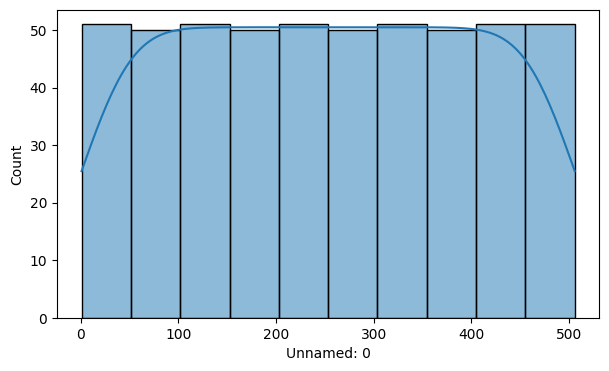

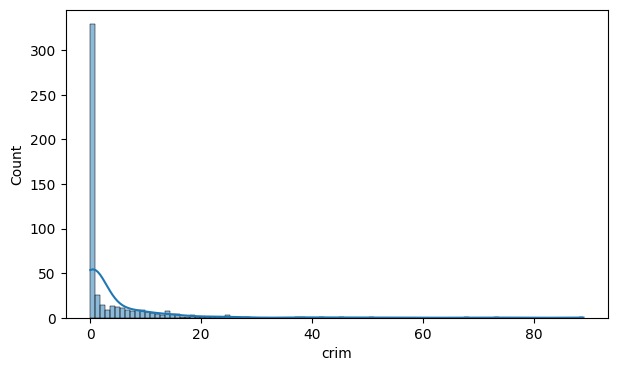

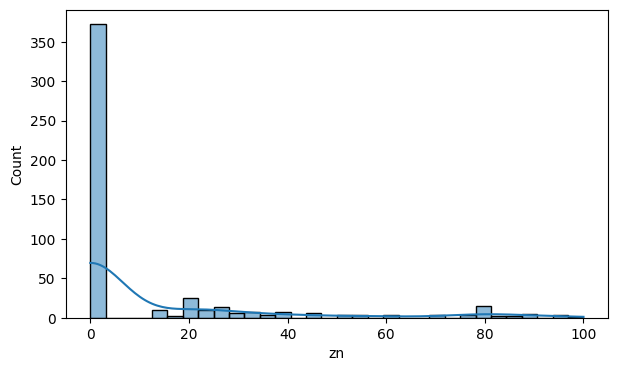

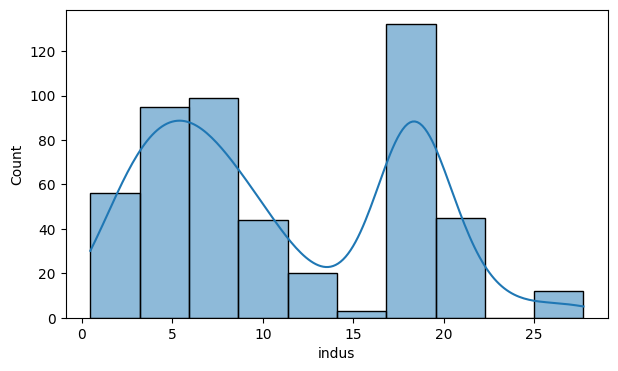

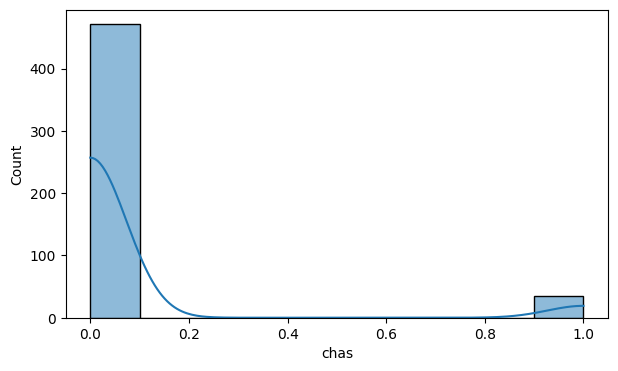

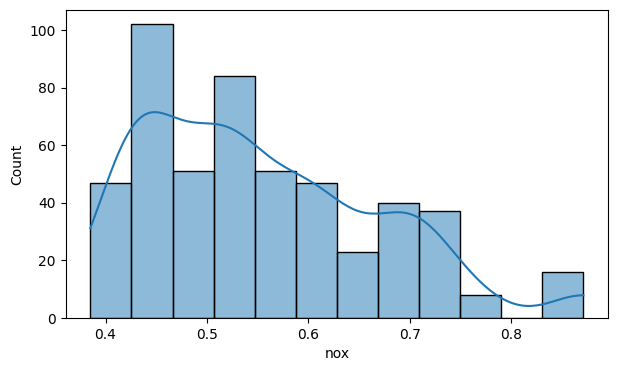

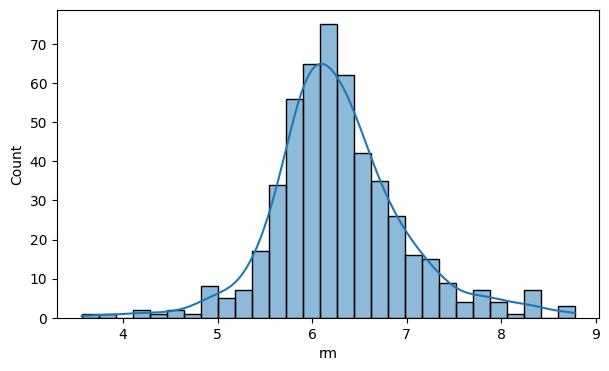

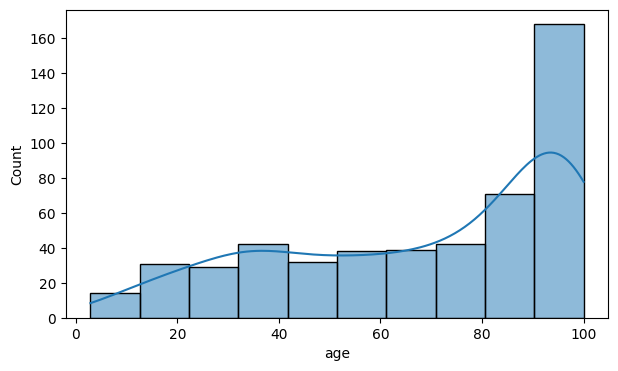

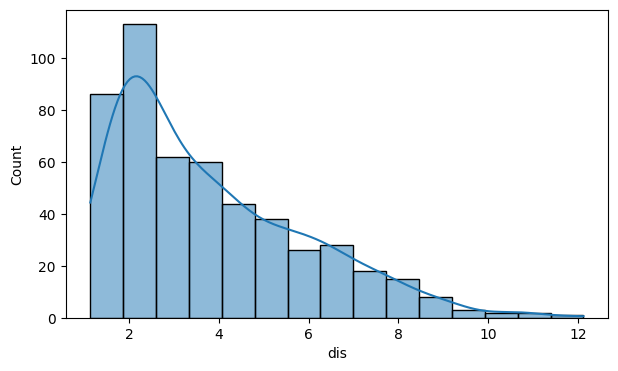

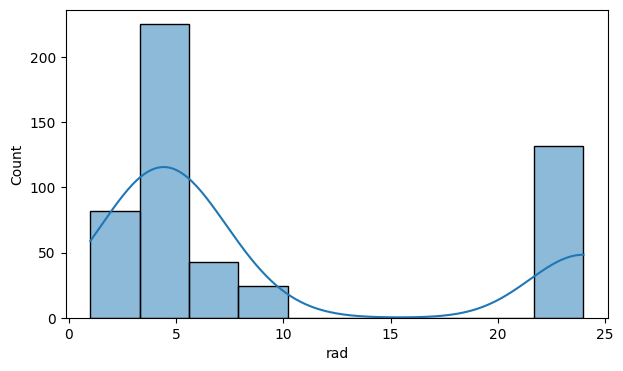

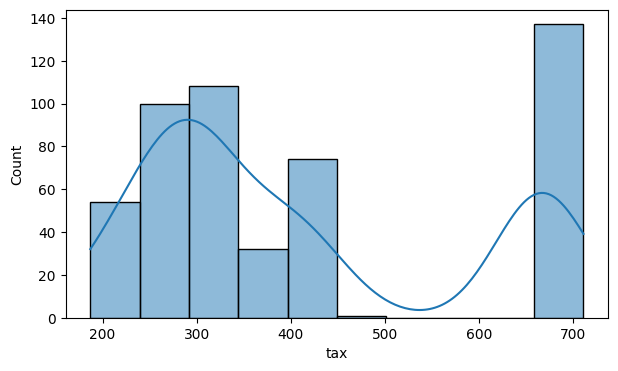

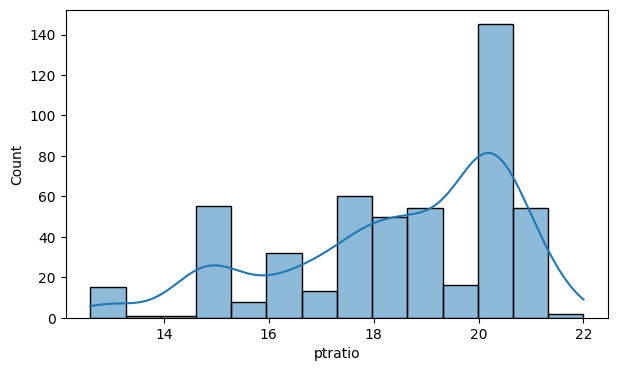

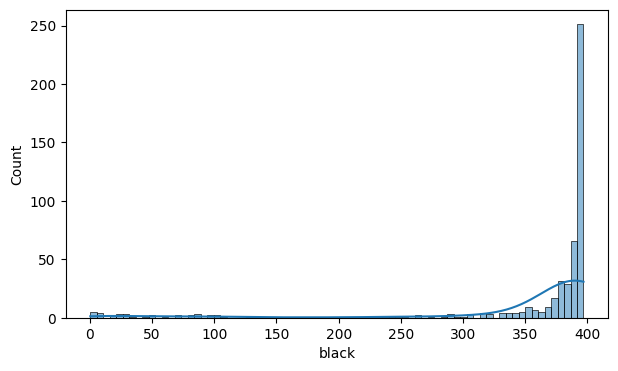

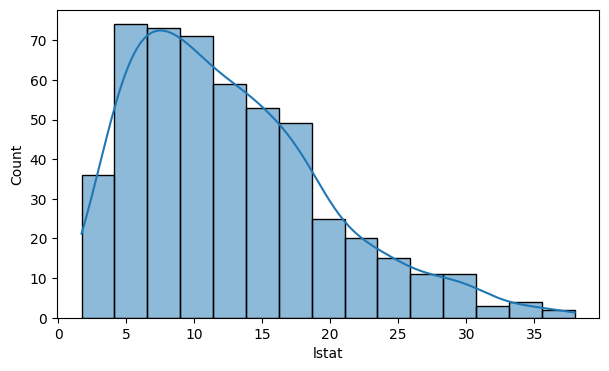

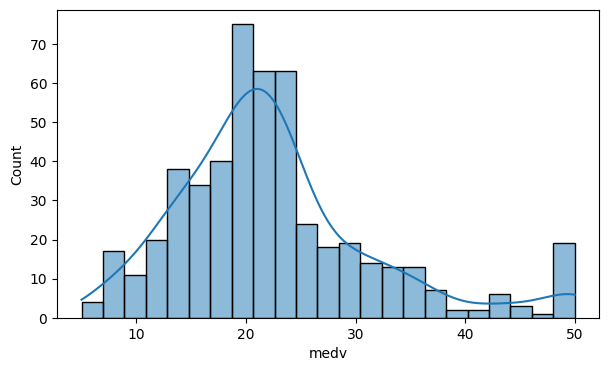

In [15]:
# Plotting all the columns to look at their distributions
for i in df.columns:
    
    plt.figure(figsize = (7, 4))
    
    sns.histplot(data = df, x = i, kde = True)
    
    plt.show()

In [19]:
df['MEDV_log'] = np.log(df['medv'])

<Axes: xlabel='MEDV_log', ylabel='Count'>

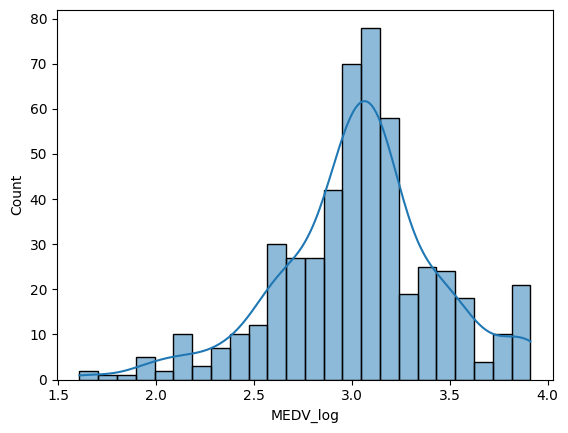

In [20]:
sns.histplot(data = df, x = 'MEDV_log', kde = True)

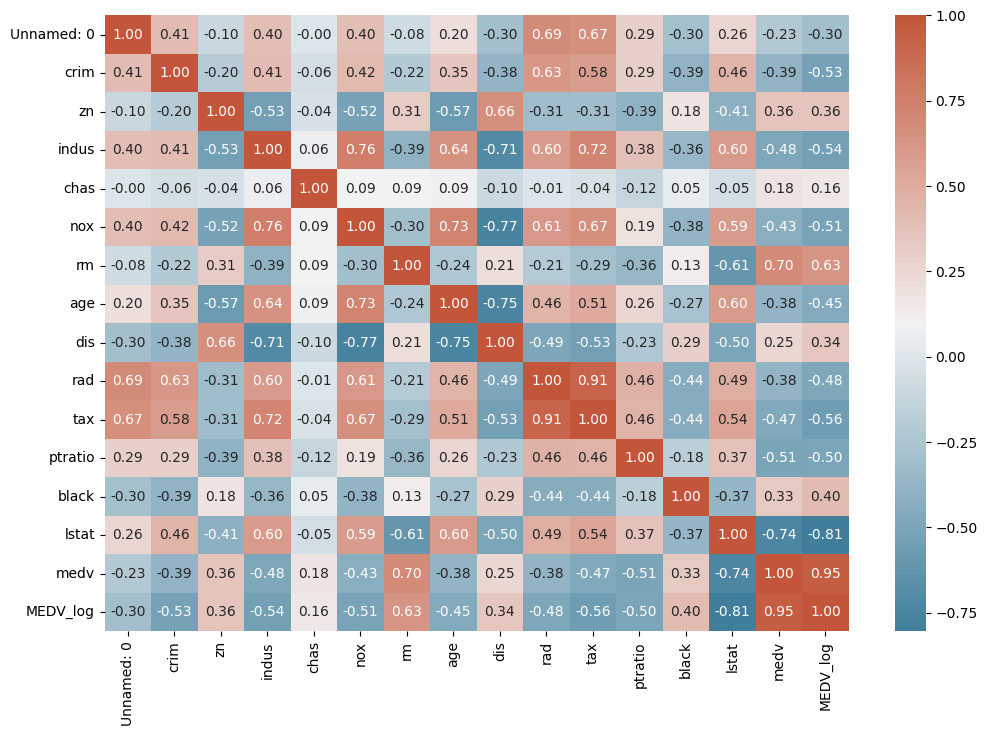

In [21]:
plt.figure(figsize = (12, 8))

cmap = sns.diverging_palette(230, 20, as_cmap = True)

sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = cmap)

plt.show()

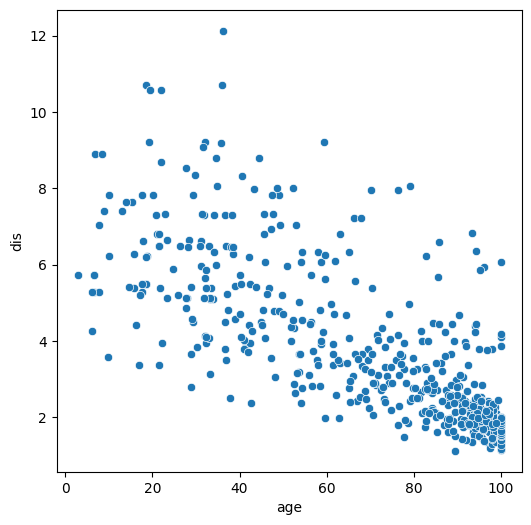

In [24]:
# Scatterplot to visualize the relationship between AGE and DIS
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'age', y = 'dis', data = df)

plt.show()

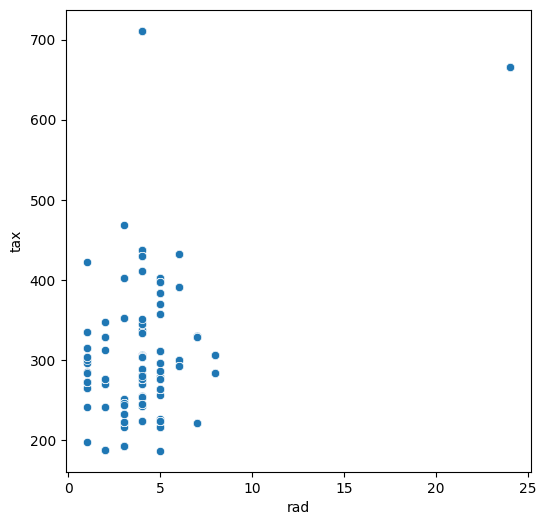

In [26]:
# Scatterplot to visulaize the relationship between RAD and TAX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'rad', y = 'tax', data = df)

plt.show()

In [27]:
# Remove the data corresponding to high tax rate
df1 = df[df['tax'] < 600]

# Import the required function
from scipy.stats import pearsonr

# Calculate the correlation
print('The correlation between TAX and RAD is', pearsonr(df1['tax'], df1['rad'])[0])

The correlation between TAX and RAD is 0.24975731331429205


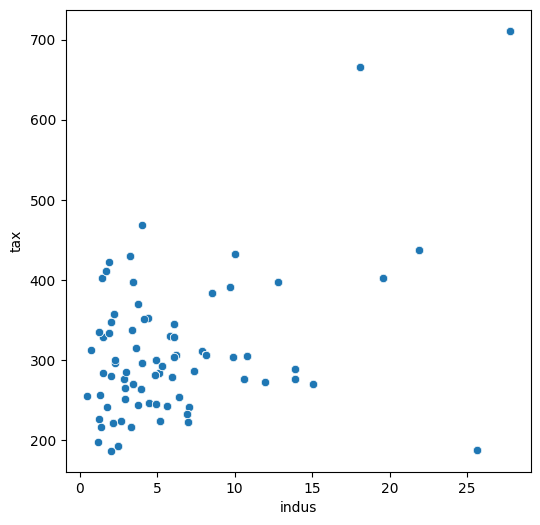

In [29]:
# Scatterplot to visualize the relationship between INDUS and TAX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'indus', y = 'tax', data = df)

plt.show()

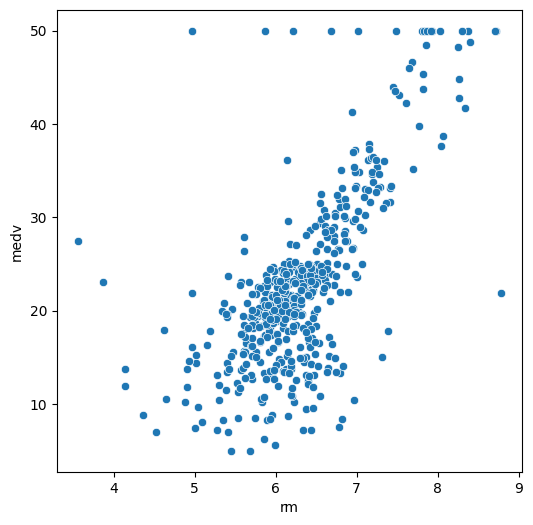

In [30]:
# Scatterplot to visulaize the relationship between RM and MEDV
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'rm', y = 'medv', data = df)

plt.show()

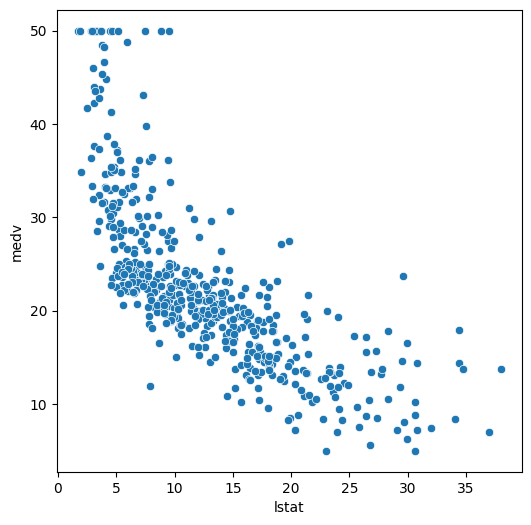

In [31]:
# Scatterplot to visulaize the relationship between LSTAT and MEDV
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'lstat', y = 'medv', data = df)

plt.show()

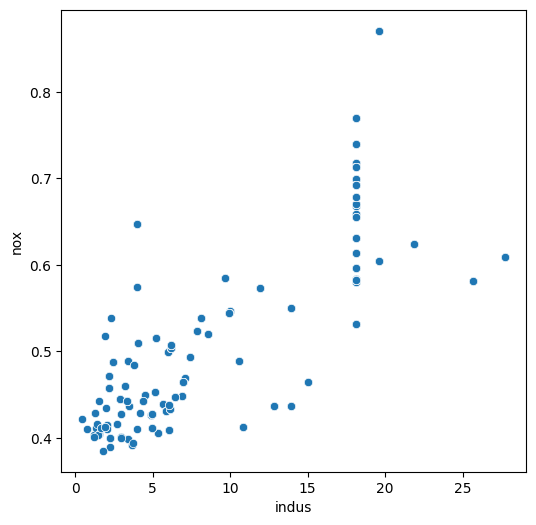

In [32]:
# Scatterplot to visualize the relationship between INDUS and NOX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'indus', y = 'nox', data = df)

plt.show()

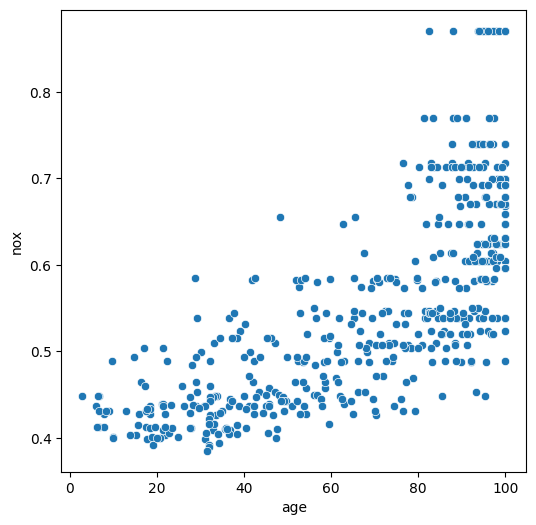

In [33]:
# Scatterplot to visualize the relationship between AGE and NOX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'age', y = 'nox', data = df)

plt.show()

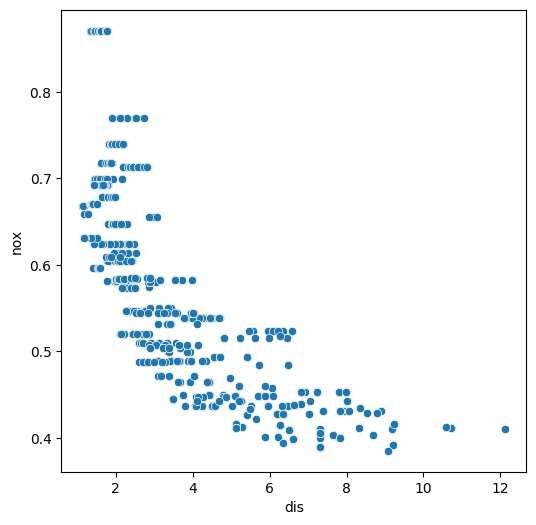

In [34]:
# Scatterplot to visualize the relationship between DIS and NOX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'dis', y = 'nox', data = df)

plt.show()

In [35]:
# Separate the dependent variable and indepedent variables
Y = df['MEDV_log']

X = df.drop(columns = {'medv', 'MEDV_log'})

# Add the intercept term
X = sm.add_constant(X)

In [36]:
# splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

       feature         VIF
0        const  587.216817
1   Unnamed: 0    2.282913
2         crim    1.993781
3           zn    2.795249
4        indus    4.013317
5         chas    1.080706
6          nox    4.431217
7           rm    1.880090
8          age    3.230000
9          dis    4.387807
10         rad    9.258168
11         tax   10.259227
12     ptratio    1.948590
13       black    1.385250
14       lstat    2.929747


In [39]:
# Create the model after dropping TAX
X_train = X_train.drop(columns = 'tax')

# Check for VIF
print(checking_vif(X_train))

       feature         VIF
0        const  583.945977
1   Unnamed: 0    2.268409
2         crim    1.992686
3           zn    2.554560
4        indus    3.303941
5         chas    1.054008
6          nox    4.398848
7           rm    1.876635
8          age    3.226771
9          dis    4.369546
10         rad    4.243708
11     ptratio    1.914600
12       black    1.384982
13       lstat    2.928201


In [41]:
# Create the model using ordinary least squared
model1 = sm.OLS(y_train,X_train).fit()

# Get the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     88.70
Date:                Fri, 31 May 2024   Prob (F-statistic):          9.86e-101
Time:                        23:07:21   Log-Likelihood:                 79.422
No. Observations:                 354   AIC:                            -130.8
Df Residuals:                     340   BIC:                            -76.67
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5251      0.253     17.859      0.000       4.027       5.023
Unnamed: 0    -0.0002      0.000     -1.495      0.136      -0.000    5.11e-05
crim          -0.0122      0.002     -7.039      0.000      -0.016      -0.009
zn             0.0012      0.001      1.649      0.100      -0.000       0.003
indus          0.0002      0.003      0.067      0.947      -0.005       0.006
chas           0.1184      0.039      3.062      0.002       0.042       0.194
nox           -1.0243      0.187     -5.490      0.000      -1.391      -0.657
rm             0.0573      0.021      2.760      0.006       0.016       0.098
age            0.0001      0.001      0.162      0.872      -0.001       0.001
dis           -0.0509      0.010     -4.957      0.000      -0.071      -0.031
rad            0.0100      0.002      4.077      0.000       0.005       0.015
ptratio       -0.0458      0.007     -6.764      0.000      -0.059      -0.032
black          0.0002      0.000      1.789      0.074   -2.43e-05       0.001
lstat         -0.0292      0.002    -11.839      0.000      -0.034      -0.024
==============================================================================
Omnibus:                       32.561   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.795
Skew:                           0.403   Prob(JB):                     5.23e-20
Kurtosis:                       5.317   Cond. No.                     1.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
# Create the model after dropping columns 'MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'INDUS' from df DataFrame
Y = df['MEDV_log']

X = df.drop(['zn','age','indus'], axis=1)

X = sm.add_constant(X)

# Splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30 , random_state = 1)

# Create the model
model2 = sm.OLS(y_train,X_train).fit()

# Get the model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.491e+29
Date:                Fri, 31 May 2024   Prob (F-statistic):               0.00
Time:                        23:08:35   Log-Likelihood:                 11325.
No. Observations:                 354   AIC:                        -2.262e+04
Df Residuals:                     340   BIC:                        -2.257e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.442e-15   7.18e-15     -0.479      0.632   -1.76e-14    1.07e-14
Unnamed: 0  2.071e-17    1.7e-18     12.171      0.000    1.74e-17    2.41e-17
crim       -2.537e-17   3.29e-17     -0.770      0.442   -9.02e-17    3.94e-17
chas        5.166e-15   6.31e-16      8.184      0.000    3.92e-15    6.41e-15
nox          1.11e-15   2.89e-15      0.385      0.701   -4.57e-15    6.79e-15
rm          1.804e-16    3.5e-16      0.516      0.607   -5.08e-16    8.69e-16
dis         4.649e-16   1.32e-16      3.511      0.001    2.04e-16    7.25e-16
rad         6.245e-17   5.63e-17      1.109      0.268   -4.83e-17    1.73e-16
tax        -1.496e-17   2.79e-18     -5.370      0.000   -2.04e-17   -9.48e-18
ptratio     1.518e-17   1.08e-16      0.140      0.889   -1.98e-16    2.28e-16
black       -9.66e-18   2.19e-18     -4.402      0.000    -1.4e-17   -5.34e-18
lstat       4.727e-17   4.49e-17      1.053      0.293   -4.11e-17    1.36e-16
medv        3.556e-17   7.71e-17      0.461      0.645   -1.16e-16    1.87e-16
MEDV_log       1.0000   1.97e-15   5.09e+14      0.000       1.000       1.000
==============================================================================
Omnibus:                       10.800   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.770
Skew:                          -0.393   Prob(JB):                      0.00459
Kurtosis:                       2.665   Cond. No.                     2.76e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
residuals = model2.resid

np.mean(residuals)

3.318124180941852e-16

In [44]:
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

<Axes: ylabel='Count'>

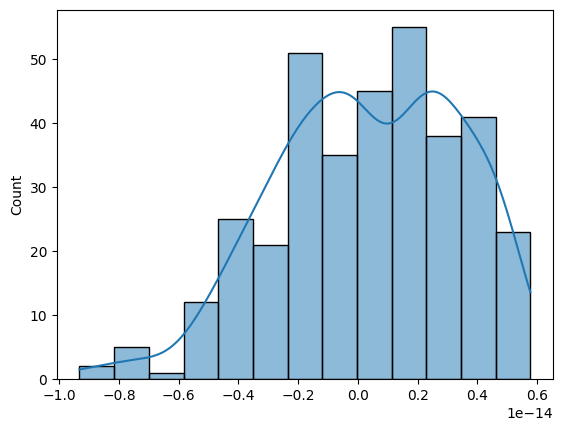

In [47]:
# Plot histogram of residuals

sns.histplot(residuals, kde = True)

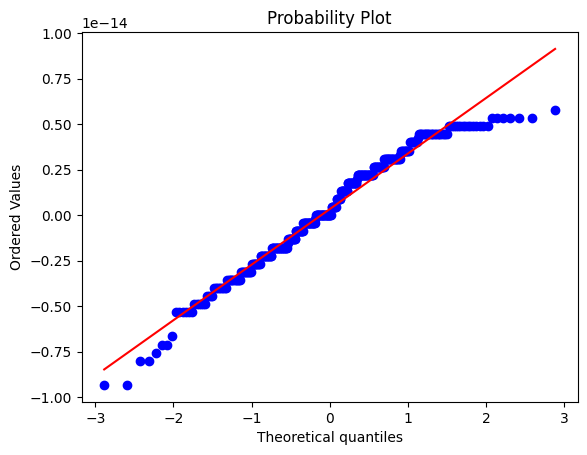

In [48]:
# Plot q-q plot of residuals
import pylab

import scipy.stats as stats

stats.probplot(residuals, dist = "norm", plot = pylab)

plt.show()

In [49]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))

## R2
from sklearn.metrics import r2_score


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # In-sample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
                "r2": [
                    r2_score(y_pred_train, y_observed_train),
                    r2_score(y_pred_test, y_observed_test),
                ],
            }
        )
    )


# Checking model performance
model_pref(model2, X_train, X_test)  

    Data          RMSE           MAE          MAPE   r2
0  Train  3.092115e-15  2.559785e-15  8.628819e-14  1.0
1   Test  2.732391e-15  2.379675e-15  7.983805e-14  1.0


In [50]:
# Import the required function

from sklearn.model_selection import cross_val_score

# Build the regression model and cross-validate
linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 1.000 (+/- 0.000)
Mean Squared Error: 0.000 (+/- 0.000)


In [52]:
#performs linear regression
def linear_reg(x_train, y_train, x_test, y_test):
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    return lr.predict(x_test)

In [61]:
#performs polynomial regresssion
def polynomial_reg(x_train, y_train, x_test, y_test):
    pr = LinearRegression()
    #transform feature to get higher order terms
    xp = PolynomialFeatures(degree=2)
    px_train = xp.fit_transform(x_train)
    px_test = xp.fit_transform(x_test)
    pr.fit(px_train, y_train)
    return pr.predict(px_test)

In [64]:
# Import necessary libraries
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, WhiteKernel
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import numpy as np

# Define the kernel
krnl = ConstantKernel(1.0, (1e-1, 1e3)) + RBF(1.0, (1e-3, 1e3))

# Create the Gaussian Process Regressor model with increased alpha
model = GaussianProcessRegressor(kernel=krnl, normalize_y=True, alpha=1e-1, random_state=0)

# Print statements
print("Creating GPR ConstantKernel + RBF model")

# Train the model
print("Training model")
model.fit(x_train, y_train)  # Corrected the training method for GPR
print("Done")

# Optional: Predict and print results
y_pred = model.predict(x_test)
print("Predictions:", y_pred)

# Define a new kernel with an additional WhiteKernel
krnl = ConstantKernel(1.0, (1e-1, 1e3)) + \
    RBF(1.0, (1e-3, 1e3)) + \
    WhiteKernel(noise_level=1.0)

# Use the model to predict
X = x_test[0].reshape(1, -1)  # first test item
pred_y, pred_std = model.predict(X, return_std=True)
print("\nPredicting for X = ")
print(X)
print("\nPredicted y = %0.4f with std = %0.4f " % (pred_y, pred_std))


Creating GPR ConstantKernel + RBF model
Training model
Done
Predictions: [ 0.64054878  0.85607049 -0.2829239   0.45513375  0.41949805  0.55367346
 -0.9326783  -0.02126831  0.9880932  -0.68847686  0.99617091  0.46647822
 -0.2009649  -0.53885272 -0.02667883 -0.8153148   0.30423482  0.94082785
 -0.54208792  0.99512065]

Predicting for X = 
[[6.92472119]]

Predicted y = 0.6405 with std = 0.0689 


In [51]:
coef = model2.params

pd.DataFrame({'Feature' : coef.index, 'Coefs' : coef.values})

,Feature,Coefs
0,const,-3.441691e-15
1,Unnamed: 0,2.070826e-17
2,crim,-2.537033e-17
3,chas,5.166007e-15
4,nox,1.110223e-15
5,rm,1.804112e-16
6,dis,4.649059e-16
7,rad,6.245005e-17
8,tax,-1.496199e-17
9,ptratio,1.517883e-17


In [81]:
# # Demo code. Replace “lt” with Boolean operator symbol.

# # boston_gauss_process.py
# # Gaussian process regression

# # Anaconda3-2022.10  Python 3.9.13
# # scikit 1.0.2
# # Windows 10/11 

# import numpy as np
# import pandas as pd
# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.gaussian_process.kernels import RBF, ConstantKernel
# from sklearn.model_selection import train_test_split

# # Load the dataset
# df = pd.read_csv("Boston.csv")

# # Splitting the data into features (X) and target (y)
# X = df.drop(columns=['crim'])
# y = df['crim']

# # Splitting the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# # Create the model
# model2 = sm.OLS(y_train, X_train).fit()

# def accuracy(model2, data_X, data_y, pct_close):
#     # correct within pct of true income
#     n_correct = 0
#     n_wrong = 0

#     for i in range(len(data_X)):
#         X = data_X[i].reshape(1, -1)  # one-item batch
#         y = data_y[i]
#         pred = model.predict(X)  # predicted house price

#         if np.abs(pred - y) < np.abs(pct_close * y):
#             n_correct += 1
#         else:
#             n_wrong += 1
#     acc = (n_correct * 1.0) / (n_correct + n_wrong)
#     return acc

# # Main code
# def main():
#     # 0. prepare
#     print("\nBegin scikit Gaussian process regression ")
#     print("Predict Boston area house median price ")
#     np.random.seed(1)
#     np.set_printoptions(precision=4, suppress=True)

#     # 1. load data
#     print("\nLoading train and test data ")
#     train_file = "Boston.csv"
#     test_file = "Boston.csv"
  

#     # 2. create and train GPR model
#     print("\nCreating GPR ConstantKernel + RBF model ")

#     krnl = ConstantKernel(1.0, (1e-1, 1e3)) + RBF(1.0, (1e-3, 1e3))
#     model = GaussianProcessRegressor(kernel=krnl, alpha=0.0, normalize_y=True, random_state=0)

#     print("\nTraining model ")
#     model.fit(X_train, y_train)
#     print("Done ")

#     # 3. compute model accuracy
#     print("\nComputing accuracy (within 0.15 of true price) ")
#     acc_train = accuracy(model, X_train, y_train, 0.15)
#     print("\nAccuracy on train data = %0.4f " % acc_train)
#     acc_test = accuracy(model, X_test, y_test, 0.15)
#     print("Accuracy on test data = %0.4f " % acc_test)

#     print("\nEnd GPR demo ")

# if __name__ == "__main__":
#     main()
